# Функции в Pandas
Примеры из презентации

In [ ]:
#Задание 1**
#Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
#- оценка 2 и меньше - низкий рейтинг
#- оценка 4 и меньше - средний рейтинг
#- оценка 4.5 и 5 - высокий рейтинг

#Результат классификации запишите в столбец class

In [40]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [47]:
def moviegroupa(rating): 
    if rating <= 2:
        return 'low_rate'
    elif rating <= 4:
        return 'medium_rate'
    else:
        return 'high_rate'

#elif ratings['rating'] <= 4:
#        return 'medium_rate'
#    else:
#        return 'high_rate'


In [49]:
ratings['class'] = ratings['rating'].apply(moviegroupa)
ratings.head(15)

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium_rate
1,1,3,4.0,964981247,medium_rate
2,1,6,4.0,964982224,medium_rate
3,1,47,5.0,964983815,high_rate
4,1,50,5.0,964982931,high_rate
5,1,70,3.0,964982400,medium_rate
6,1,101,5.0,964980868,high_rate
7,1,110,4.0,964982176,medium_rate
8,1,151,5.0,964984041,high_rate
9,1,157,5.0,964984100,high_rate


In [ ]:
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет 
выставить географическую принадлежность определенному региону. 
Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

In [76]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [77]:
dataframe = pd.read_csv('keywords.csv')
dataframe.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [80]:
def regionassign(keyword):
    for key, value in geo_data.items():
        for city in value:
            if city in keyword:
                return key
    return 'no region'

In [81]:
dataframe['region'] = dataframe['keyword'].apply(regionassign)
dataframe.head()

,keyword,shows,region
0,вк,64292779,no region
1,одноклассники,63810309,no region
2,порно,41747114,no region
3,ютуб,39995567,no region
4,вконтакте,21014195,no region


In [84]:
dataframe.region.unique()

array(['no region', 'Центр', 'Северо-Запад', 'Дальний Восток'],
      dtype=object)

In [ ]:
# Можно ли решить это задание без 

In [55]:
import pandas as pd

In [2]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [ ]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0], 'calculated': [False, False, True]})
df[['user_id', 'clicks', 'orders', 'calculated']]

In [27]:
def watcher(param):
    """Мне только посмотреть"""
    return param == 0

In [28]:
df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,conversion,watcher
0,1,163,2,0.012270,False
1,2,130,4,0.030769,False
2,3,97,0,0.000000,True


Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [4]:
def conversion(row):
    """Подсчет конверсии переходов в покупки"""
    return row['orders'] / row['clicks']

### Как потестировать функцию со значениями одной строки

In [ ]:
row1 = pd.DataFrame({'clicks': [163], 
                     'orders': [2], 
                     'user_id': [1]})
conversion(row1)

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [ ]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df[['user_id', 'clicks', 'orders']]

In [6]:
df['conversion'] = df.apply(conversion, axis=1)

In [7]:
df[['user_id', 'clicks', 'orders', 'conversion']]

,user_id,clicks,orders,conversion
0,1,163,2,0.012270
1,2,130,4,0.030769
2,3,97,0,0.000000


### Как создавать столбцы с помощью функций

In [ ]:
df = pd.DataFrame({'user_id': [1, 2, 3]})

In [ ]:
df

In [ ]:
def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id): 1})

In [ ]:
df = df.apply(metriks, axis=1)
df

### Анализ рекламных кампаний

In [6]:
import pandas as pd

In [9]:
pip install xlrd

     |████████████████████████████████| 103 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
os.getcwd()

'/Users/mburkivska/Desktop/pyda-hw-final/pyda-homework/Python_11_functions_groupby'

In [10]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [11]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [ ]:
phrase = 'МРТ на Менделеевской от 2000'

In [ ]:
len(phrase.split(' '))

In [12]:
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [13]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


Простая визуализация

In [14]:
%matplotlib inline

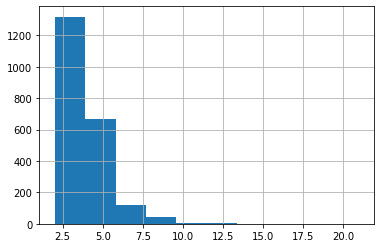

In [15]:
stats['word_count'].hist()

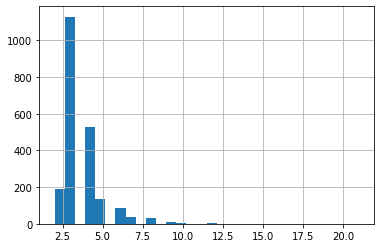

In [16]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [ ]:
# обращение к индексу и значениям Series
res = stats.word_count.value_counts()
res

In [ ]:
res.index[0]

In [ ]:
res.values[0]

In [ ]:
# пример ссылки
url = stats.loc[0, 'link']
url

In [ ]:
from urllib import parse

In [ ]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal#abc')

In [ ]:
parsed = parse.urlsplit(url)
parsed

In [ ]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

In [ ]:
# как доставать значения

parsed.netloc

In [ ]:
params = parse.parse_qs(parsed.query)
params

In [ ]:
# вот и кампании

params['utm_campaign'][0]

In [ ]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

In [ ]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [ ]:
# проверяем датафрейм
stats.head()

In [ ]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

### Как передать в функцию несколько аргументов

In [ ]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [ ]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

### Упражнение
В наших данных есть много объявлений с услугой МРТ (в столбце group есть слово 'мрт') круглосуточно (в тексте объявления text есть '24 часа'). Отфильтруйте строки, в которых НЕ упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

# Группировки

In [ ]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

Объединим процесс разбиения на датафреймы

In [ ]:
def groupby_function(data):
    return data.amount.max() - data.amount.min()

In [ ]:
df.groupby('country').apply(groupby_function)

Вернемся к статистике рекламных кампаний

In [ ]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

In [ ]:
# более универсальный способ

stats.groupby('campaign').count().head()

In [ ]:
stats.groupby('campaign').count()[['group', 'effect']].head()

### Как вернуть столбец из индекса - метод reset_index()

In [ ]:
stats.groupby('campaign').count().reset_index().head()

### К группировке можно применять разные функции такие образом:

In [ ]:
obj = stats.groupby('campaign')

In [ ]:
obj.max().head()

In [ ]:
obj.mean().head()

### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [ ]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

In [ ]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

### Как обращаться к вложенным столбцам

In [ ]:
results['effect']['max'].head()

In [ ]:
# или даже так
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max'].head()

In [ ]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

In [ ]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 